# basic import

In [2]:
from pydub import AudioSegment
import matplotlib.pyplot as plt
import numpy as np
import wave
import sys
from scipy.io import wavfile as wav
from scipy.fftpack import fft
from playsound import playsound


C:\Users\迪逼迪逼\AppData\Local\Programs\Python\Python38\lib\site-packages\pydub\utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


# convert *muti* channel wave to *mono* channel


In [3]:
# convert to mono
def to_mono(file):
    from pydub import AudioSegment
    sound = AudioSegment.from_wav(file)
    sound = sound.set_channels(1)
    sound.export(file, format='wav')
    print("convert to mono success!")
#reference:
# https://stackoverflow.com/questions/5120555/how-can-i-convert-a-wav-from-stereo-to-mono-in-python

# time domain plot


<ipython-input-7-9f5c01a8163b>:5: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  signal = np.fromstring(signal, "Int16")
<ipython-input-7-9f5c01a8163b>:5: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  signal = np.fromstring(signal, "Int16")


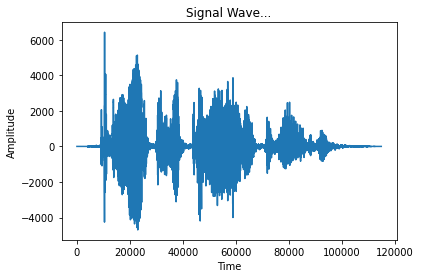

In [7]:
def time_domain(file,limit=30000):
    spf = wave.open(file, "r")
    # Extract Raw Audio from Wav File
    signal = spf.readframes(-1)
    signal = np.fromstring(signal, "Int16")
    plt.figure(figsize=(6,4))
    plt.figure(1)
    plt.title("Signal Wave...")
    plt.plot(signal)
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    if limit <=20000 :
        plt.xlim((0, limit)) 
    plt.show()
time_domain("test.wav")

# Spectrogram

C:\Users\迪逼迪逼\AppData\Local\Programs\Python\Python38\lib\site-packages\matplotlib\axes\_axes.py:7558: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


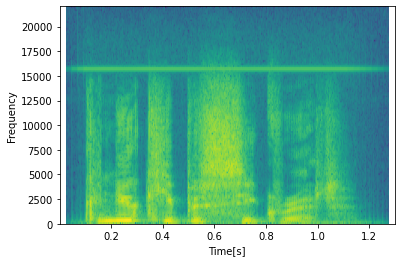

In [6]:
def Spectrogram(audio,limit=30000):
    samplingFrequency, signalData = wav.read(audio)
    plt.figure(figsize=(6,4))
    plt.specgram(signalData,Fs=samplingFrequency)
    plt.xlabel('Time[s]')
    plt.ylabel('Frequency')
    if limit <=20000 :
        plt.xlim((0, limit)) 
    plt.show()
Spectrogram('mono_test.wav')

# frequncy domain plot


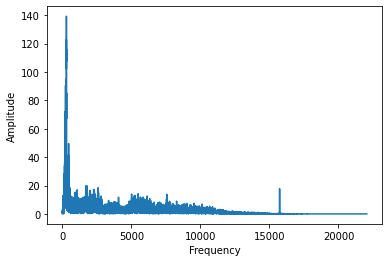

In [8]:
def frequncy_domain(file,limit=30000) :
    rate, data = wav.read(file)
    data = data / 2.0**15 
    plt.figure(figsize=(6,4))
    #fft_out = fft(data)
    fft_out = np.fft.rfft(data)
    freq = np.fft.rfftfreq(data.size, d=1./rate)
    plt.xlabel('Frequency')
    plt.ylabel('Amplitude')
    if (freq.size!=fft_out.size):
        print("only for mono audio!")
    else :
        plt.plot(freq, np.abs(fft_out))
        if limit <=20000 :
            plt.xlim((0, limit)) 
        plt.show()
frequncy_domain("mono_test.wav")
#reference
# https://www.dummies.com/programming/python/performing-a-fast-fourier-transform-fft-on-a-sound-file/
# https://klyshko.github.io/teaching/2019-02-22-teaching

# Combine of three above plot

Audio length: 1.30 seconds
C:\Users\迪逼迪逼\AppData\Local\Programs\Python\Python38\lib\site-packages\matplotlib\axes\_axes.py:7558: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


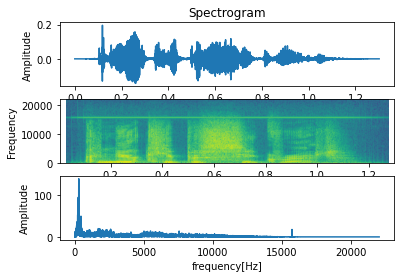

<Figure size 360x540 with 0 Axes>

In [13]:

def show_Spectrogram_mono(filename,limit=30000):
    # Read the wav file (mono)
    samplingFrequency, signalData = wav.read(filename)
    signalData = signalData / 2.0**15 
    N = signalData.shape[0]
    L = N / samplingFrequency

    print(f'Audio length: {L:.2f} seconds')

    # Plot the signal read from wav file
    plt.subplot(311)
    plt.title('Spectrogram')

    plt.plot(np.arange(N) / samplingFrequency, signalData)
    plt.xlabel('Time[s]')
    plt.ylabel('Amplitude')

    plt.subplot(312)
    plt.specgram(signalData,Fs=samplingFrequency)
    plt.xlabel('Time[s]')
    plt.ylabel('Frequency')

    plt.subplot(313)
    fft_out = np.fft.rfft(signalData)
    freq = np.fft.rfftfreq(signalData.size, d=1./samplingFrequency)
    plt.plot(freq, np.abs(fft_out))
    plt.xlabel('frequency[Hz]')
    plt.ylabel('Amplitude')
    plt.figure(figsize=(5, 7.5))
    if limit <=20000 :
        plt.xlim((0, limit)) 
    plt.show()
show_Spectrogram_mono("mono_test.wav")

#reference https://pythontic.com/visualization/signals/spectrogram

# roll by frame to increase pitch

<ipython-input-14-8609d3c24473>:16: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  data = np.fromstring(wr.readframes(size), dtype=np.int16) #read data as numpy array
C:\Users\迪逼迪逼\AppData\Local\Programs\Python\Python38\lib\site-packages\matplotlib\axes\_axes.py:7558: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)
success!!!
Audio length: 1.30 seconds


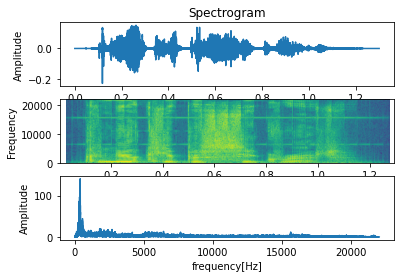

<Figure size 360x540 with 0 Axes>

In [14]:

wr = wave.open('mono_test.wav', 'r')# open file
                                    # Set the parameters for the output file.
par = list(wr.getparams())
par[3] = 0                          # The number of samples will be set by writeframes.
par = tuple(par)
ww = wave.open('mono_test_pitch1.wav', 'w') # file after rolling 
ww.setparams(par)                   # set parameter

frame = 20                          # frame size: 20
size = wr.getframerate()//frame     # Read and process 1/fr second at a time.
                                    # A larger number for frame means less reverb.
c = int(wr.getnframes()/size)       # count of the whole file
shift = 100//frame                  # set shifting 100 Hz

for num in range(c):
    data = np.fromstring(wr.readframes(size), dtype=np.int16)   # read data as numpy array
    left, right = data[0::2], data[1::2]                        # left and right channel
    lf, rf = np.fft.rfft(left), np.fft.rfft(right)              # real part FFT
    lf, rf = np.roll(lf, shift), np.roll(rf, shift)             # roll by frame
    lf[0:shift], rf[0:shift] = 0, 0                             # clear the noise
    nl, nr = np.fft.irfft(lf), np.fft.irfft(rf)                 # inverse real part FFT
    ns = np.column_stack((nl, nr)).ravel().astype(np.int16)     # combine two channel
    ww.writeframes(ns.tostring())                               # convert to string
wr.close()
ww.close()
print("success!!!")
show_Spectrogram_mono("mono_test_pitch1.wav")
#reference
# https://stackoverflow.com/questions/43963982/python-change-pitch-of-wav-file

# roll the whole file to increase pitch

In [109]:
def change_pitch(origin_data,new_data,shift):

    wr = wave.open(origin_data, 'r')            # open file
                                                # 格式資訊
                                                # (nchannels, sampwidth, framerate, nframes, comptype, compname)
                                                # Set the parameters for the output file.
    par = list(wr.getparams())
    channels, sampwidth, framerate, nframes = par[:4]
    par[3] = 0                                  # The number of samples will be set by writeframes.
    par = tuple(par)
    ww = wave.open(new_data, 'w')               # file after roll
    ww.setparams(par)                           # set WAV parameter
    data = np.fromstring(wr.readframes(nframes), dtype=np.int16) #read data as numpy array
    data = np.fft.rfft(data)                    # real part FFT
    fre_num = data.size
    data_f = np.roll(data, shift)               # roll the frequency
    if shift <= 0 :                             # deal with the part that usually cause Noise
        data_f[fre_num+shift:fre_num] = data_f[fre_num+shift:fre_num]*0.05
    else :
        data_f[0:shift+1] = data_f[0:shift+1]*0.05
    data_n = np.fft.irfft(data_f)               # inverse fourier
    data_s = data_n.ravel().astype(np.int16)    # convert to int array
    ww.writeframes(data_s.tostring())           # convert to string array, store

    wr.close()
    ww.close()
    print("success!!!")
    #show_Spectrogram_mono(new_data)
change_pitch('mono_test.wav','mono_test_pitch2.wav',100)

#reference
# https://stackoverflow.com/questions/43963982/python-change-pitch-of-wav-file

success!!!
<ipython-input-109-83fb87d2c2e4>:14: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  data = np.fromstring(wr.readframes(nframes), dtype=np.int16) #read data as numpy array


Audio length: 3.00 seconds


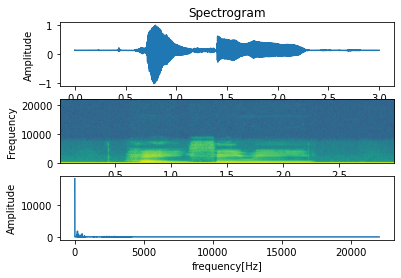

<Figure size 360x540 with 0 Axes>

Audio length: 3.00 seconds


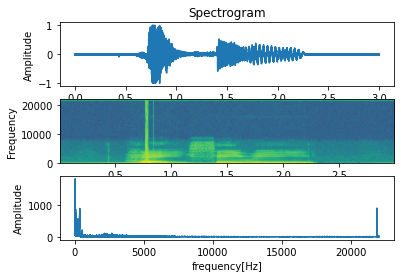

<Figure size 360x540 with 0 Axes>

In [15]:
show_Spectrogram_mono("record\\record.wav")
show_Spectrogram_mono("record\\record_pitch2.wav")

# funtion to caculate the frequency with greatest magnitude


In [16]:

def cacu_max_freq(filename):
    rate, data = wav.read(filename)
    data = data / 2.0**15 
    N = data.shape[0]
    L = N / rate
    print(f'Audio length: {L:.2f} seconds') # show the length 
    fft_out = np.fft.rfft(data)             # FFT
    freq = np.fft.rfftfreq(data.size, d=1./rate)
    max_amp = 0
    max_freq = 0
    for i in range(np.abs(fft_out).size) :
        if np.abs(fft_out[i]) >= max_amp :
            max_amp = np.abs(fft_out[i])
            max_freq = i / 1.55227273       # time rate fix
    print(max_freq)

cacu_max_freq("mono_test_pitch1.wav")
cacu_max_freq("mono_test.wav")

Audio length: 1.30 seconds
327.26207848797293
Audio length: 1.30 seconds
243.5139087961688


In [75]:
# play and listen the different
playsound("mono_test.wav")
playsound("mono_test_pitch1.wav")
playsound("mono_test_pitch1.wav")
# need to add file closing in playsound.py
# https://www.programmersought.com/article/78912701065/

# piano description


In [36]:
# make three wave mono
to_mono("data\piano-a.wav")
to_mono("data\piano-c.wav")
to_mono("data\piano-c#.wav")

convert to mono success!
convert to mono success!
convert to mono success!


In [37]:
# listen and found the different
playsound("data\piano-a.wav")
playsound("data\piano-c.wav")
playsound("data\piano-c#.wav")

In [141]:
# caculate the main ferquency 
cacu_max_freq("data\piano-a.wav")   #440.0000
cacu_max_freq("data\piano-c.wav")   #523.2511
cacu_max_freq("data\piano-c#.wav")  #554.3653

Audio length: 1.54 seconds
439.99999922693996
Audio length: 1.54 seconds
523.1039522288071
Audio length: 1.54 seconds
554.0263533457809


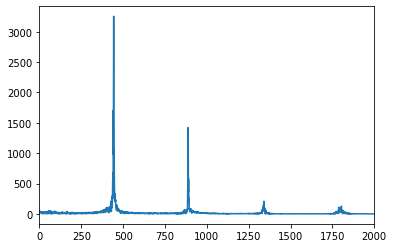

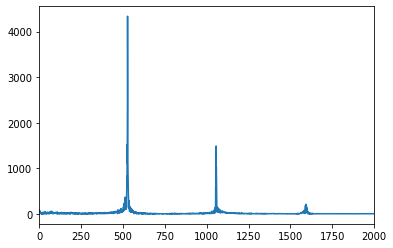

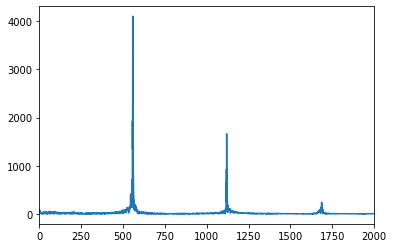

In [140]:
frequncy_domain("data\piano-a.wav",2000)
frequncy_domain("data\piano-c.wav",2000)
frequncy_domain("data\piano-c#.wav",2000)

In [110]:
# let's change the pitch from A to C
change_pitch("data\piano-a.wav","data\piano-a_new.wav",129) # 812-683=129

success!!!
<ipython-input-109-83fb87d2c2e4>:14: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  data = np.fromstring(wr.readframes(nframes), dtype=np.int16) #read data as numpy array


In [111]:
# caculate the mian ferquency and listen the difference
cacu_max_freq("data\piano-a_new.wav")   #440.0000
cacu_max_freq("data\piano-c.wav")   #523.2511
playsound("data\piano-a_new.wav")
playsound("data\piano-c.wav")
# sound different, but why?

Audio length: 1.54 seconds
812
Audio length: 1.54 seconds
812


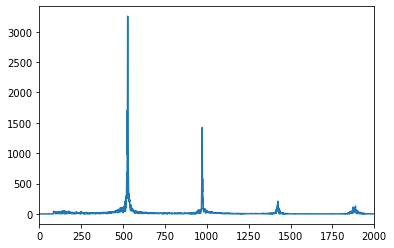

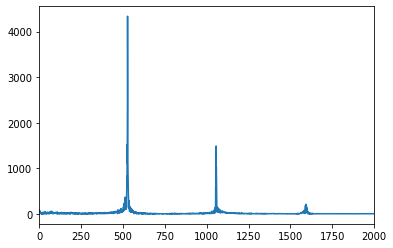

In [112]:
frequncy_domain("data\piano-a_new.wav",2000)
frequncy_domain("data\piano-c.wav",2000)
# though the main frequency is same, however, the component ferquencies are different
# most of piano sounds are "chords", which means it compose of many different ferquency

# recording 

In [83]:
import sounddevice as sd
from scipy.io.wavfile import write
import wavio as wv

freq = 44100  # Sample rate
seconds = 3  # Duration of recording

print("start recording")
myrecording = sd.rec(int(seconds * freq), samplerate=freq, channels=2)
sd.wait()  # Wait until recording is finished
print("finish")
write('record\\record.wav', freq, myrecording)  # Save as WAV file (numpy array)
wv.write("record\\record.wav", myrecording, freq, sampwidth=2) # Convert the NumPy array to audio file

start recording
finish


In [86]:
# convert the recorded file into mono
to_mono("record\\record.wav")

convert to mono success!


In [133]:
# change pitch
change_pitch("record\\record.wav","record\\record_pitch1.wav",300) 
change_pitch("record\\record.wav","record\\record_pitch2.wav",-500) 

success!!!
success!!!
success!!!
<ipython-input-109-83fb87d2c2e4>:14: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  data = np.fromstring(wr.readframes(nframes), dtype=np.int16) #read data as numpy array


In [165]:
# play sound and listen to the different
playsound("record\\record1.wav")
playsound("record\\record_pitch1.wav")
playsound("record\\record_pitch2.wav")

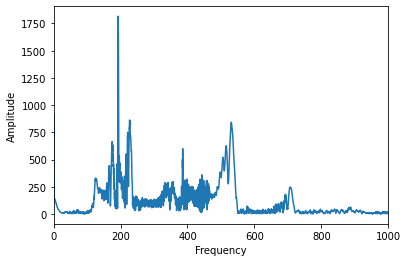

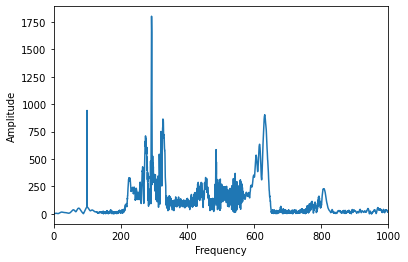

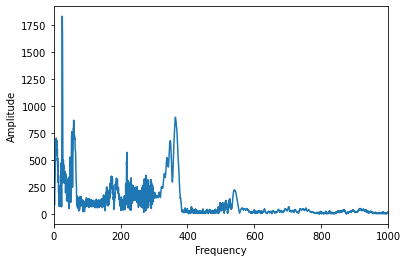

In [164]:
# see the frequency domain plot
frequncy_domain("record\\record1.wav",1000)
frequncy_domain("record\\record_pitch1.wav",1000)
frequncy_domain("record\\record_pitch2.wav",1000)